In [297]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.inspection import permutation_importance

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
#from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import accuracy_score

import xgboost as xgb

from IPython.display import display

from tqdm.auto import tqdm

**data preparation**

In [298]:
dataset = pd.read_csv(r'/home/zaib/midterm-project/water_potability.csv')

In [299]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [300]:
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [301]:
dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')

In [302]:
dataset.columns 

Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

**EDA: exploratory data analysis**

In [303]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   hardness         3276 non-null   float64
 2   solids           3276 non-null   float64
 3   chloramines      3276 non-null   float64
 4   sulfate          2495 non-null   float64
 5   conductivity     3276 non-null   float64
 6   organic_carbon   3276 non-null   float64
 7   trihalomethanes  3114 non-null   float64
 8   turbidity        3276 non-null   float64
 9   potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [304]:
dataset.dtypes

ph                 float64
hardness           float64
solids             float64
chloramines        float64
sulfate            float64
conductivity       float64
organic_carbon     float64
trihalomethanes    float64
turbidity          float64
potability           int64
dtype: object

==> the dataset contains only numerical values, and so numerical features, which simplifies the EDA: more in detail, all the 9 features are float64 type, while the target feature is of int64 type

In [305]:
columns = list(dataset.dtypes.index)
columns

['ph',
 'hardness',
 'solids',
 'chloramines',
 'sulfate',
 'conductivity',
 'organic_carbon',
 'trihalomethanes',
 'turbidity',
 'potability']

In [306]:
dataset.describe()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [307]:
analytics = []
#df_analytics.columns = columns

for c in dataset.columns:
    print(c)
    print(dataset[c].unique()[:5])
    print(dataset[c].nunique())
    #print(f'percentage of diversity for {c} is:', dataset[c].nunique()/len(dataset))
    analytics.append(dataset[c].nunique()/len(dataset))
    print()

    
df_analytics = pd.DataFrame(analytics, index=columns, columns=['%_of_data_diversity'])    
    
print("the percentage of data diversity of each feature:")
print()
display(df_analytics)

ph
[       nan 3.71608008 8.09912419 8.31676588 9.09222346]
2785

hardness
[204.89045547 129.42292051 224.23625939 214.37339409 181.10150924]
3276

solids
[20791.31898075 18630.05785797 19909.54173229 22018.41744078
 17978.98633893]
3276

chloramines
[7.30021187 6.63524588 9.2758836  8.05933238 6.54659997]
3276

sulfate
[368.51644135          nan 356.88613564 310.13573752 326.67836291]
2495

conductivity
[564.30865417 592.88535913 418.60621306 363.26651616 398.41081338]
3276

organic_carbon
[10.37978308 15.18001312 16.86863693 18.4365245  11.55827944]
3276

trihalomethanes
[ 86.99097046  56.32907628  66.42009251 100.34167437  31.99799273]
3114

turbidity
[2.96313538 4.50065627 3.05593375 4.62877054 4.07507543]
3276

potability
[0 1]
2

the percentage of data diversity of each feature:



,%_of_data_diversity
ph,0.850122
hardness,1.000000
solids,1.000000
chloramines,1.000000
sulfate,0.761600
conductivity,1.000000
organic_carbon,1.000000
trihalomethanes,0.950549
turbidity,1.000000
potability,0.000611


==> a part of the target feature that is 'potability' that has a % of diversity that is expected, the values for each feature are highly diverse

* missing values

In [308]:
dataset.isnull()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


==> we can see that our dataset contains some NaN values, let's see more in detail the quantity of these NaN values for each feature:

In [309]:
dataset.isnull().sum()

ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
potability           0
dtype: int64

==> ph, sulfate and trihalomethanes are the features containing missing values: these non existant values will be replaced with zeros 

In [310]:
dataset = dataset.fillna(0)

In [311]:
dataset.isnull().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

* Dividing the dataset:

In [312]:
df_full_train, df_test = train_test_split(dataset, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [313]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [314]:
y_train = df_train.potability.values
y_val = df_val.potability.values
y_test = df_test.potability.values

y_full_train = df_train_full.potability.values

In [315]:
del df_train['potability']
del df_val['potability']
del df_test['potability']

In [316]:
len(df_train), len(df_val), len(df_test), len(df_full_train)

(1965, 655, 656, 2620)

* Feature importance: find out which features have the more impact on the target variable that is potability

In [317]:
dataset.potability.value_counts()

potability
0    1998
1    1278
Name: count, dtype: int64

overall potability percentage of the dataset

In [318]:
dataset.potability.value_counts(normalize=True)

potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

==> there's not such a high class imbalance in the dataset, but this should be taken into consideration anyways when building the prediction models

potability percentage of the overall training dataset

In [319]:
df_full_train.potability.value_counts(normalize=True)

potability
0    0.620229
1    0.379771
Name: proportion, dtype: float64

* checking for each of the features the potability percentage and the correctness of the values considering the indicated and acknoledged WHO values for which water is considered to be consumable:

In [320]:
# ph: important parameter in evaluating the acid–base balance of water
# based on WHO drinking water should have a ph that is 6.5<=ph<=9.5:

df_full_train[(df_full_train.ph >= 6.5) & (df_full_train.ph <= 9.5)].potability.value_counts(normalize=True)

potability
0    0.590769
1    0.409231
Name: proportion, dtype: float64

In [321]:
# % of correct values for ph in the dataset

len(df_full_train[(df_full_train.ph >= 6.5) & (df_full_train.ph <= 9.5)]) / len(df_full_train)

0.4961832061068702

==> only 50% (almost) of the data has correct values for ph 
and almost 60% of the drinking water based on ph only is actually not consumable; 
this info just points out that 'ph' feature alone may be not enough for potability prediction

In [322]:
# hardness: that is calcium and magnesium concentration in the water
# recommanded values are such that 10 <= hardness <= 500, for the water to be consumable

df_full_train[(df_full_train.hardness >= 10) & (df_full_train.hardness <= 500)].potability.value_counts(normalize=True)

potability
0    0.620229
1    0.379771
Name: proportion, dtype: float64

In [323]:
# % of correct values for hardness in the dataset

len(df_full_train[(df_full_train.hardness >= 10) & (df_full_train.hardness <= 500)]) / len(df_full_train)

1.0

==> all the values for hardness in the dataset respect the limits, which is a good for the research, but, and based on the potability percentage, 'hardness' may be reliable as a feature for potability prediction

In [324]:
# solids (total dissolved solids -TDS) concentration in water
# should be 500 <= TDS <= 1000 [mg/l] for water to be consumable

df_full_train[(df_full_train.solids >= 500) & (df_full_train.solids <= 1000)].potability.value_counts(normalize=True)

potability
1    1.0
Name: proportion, dtype: float64

In [325]:
# % of correct values of solids in the dataset

len(df_full_train[(df_full_train.solids >= 500) & (df_full_train.solids <= 1000)]) / len(df_full_train)

0.0003816793893129771

==> the % of correctness of the values for solids TDS is really low, and all the water with these values is 100% potable: this is not really indicative

In [326]:
# chloramines: the major disinfectants used in public water systems 
# it should be chloramines >= 4 

df_full_train[df_full_train.chloramines >= 4].potability.value_counts(normalize=True)

potability
0    0.619663
1    0.380337
Name: proportion, dtype: float64

In [327]:
# % of correct values for chloramines in the dataset according to WHO

len(df_full_train[df_full_train.chloramines >= 4]) / len(df_full_train)

0.9744274809160305

==> there's a high percentage of correct values for chloramines, but just a few of them lead to potability: chloramines alone might not be sufficient as a discriminatory feature 

In [328]:
# sulfate: values here are really sparse, based on the geographical 
# location; therefore a much more complex analysis method would be 
# required 

In [329]:
# conductivity:ions concentration in water 
# according to WHO it should be conductivity <= 400

df_full_train[df_full_train.conductivity <= 400].potability.value_counts(normalize=True)

potability
0    0.624765
1    0.375235
Name: proportion, dtype: float64

In [330]:
# % of the data with acceptable values of conductivity

len(df_full_train[df_full_train.conductivity <= 400]) / len(df_full_train)

0.4068702290076336

==> based on these results, just 15% of the water is consumable

In [331]:
# organic_carbon: total organic carbon concentration in water 
# according to WHO organic_carbon <= 2 in drinking water and 
# organic_carbon <= 4 in source water used for treatment, 
# however there may not be abnormal TOC changes in drinking 
# water supplies.  


In [332]:
# trihalomethanes: chemicals which may be found in water treated with chlorine
#  THM levels up to 80 ppm is considered safe in drinking water

df_full_train[df_full_train.trihalomethanes >= 80].potability.value_counts(normalize=True)

potability
0    0.615222
1    0.384778
Name: proportion, dtype: float64

In [333]:
# percentage of correct values for trihalomethanes in the dataset

len(df_full_train[df_full_train.trihalomethanes >= 80]) / len(df_full_train)

0.18053435114503816

==> just 18% of the data has correct values for trihalomethanes, 
and only 38% of the water results to be potable: trihalomethanes alone 
might be insufficient for potability prediction

In [334]:
# turbidity: a measure of light emitting properties of water
# the WHO recommended value is turbidity <= 5

df_full_train[df_full_train.turbidity <= 5].potability.value_counts(normalize=True)

potability
0    0.619629
1    0.380371
Name: proportion, dtype: float64

In [335]:
# percentage of correct values for turbidity in the dataset

len(df_full_train[df_full_train.turbidity <= 5]) / len(df_full_train)

0.9061068702290076

==> with respect to trihalomethanes, turbidity is much more indicative as a feature for potability prediction, but still it tells that only 34% (91% x 38%) of the water - supposed to be consumable based on turbidity values for potability - is potable, therefore it may be not enough as a stand-alone feature, but it could be a great indicator

* potability rate 
* correlation

In [336]:
global_potability_rate = df_full_train.potability.mean()
global_potability_rate

0.3797709923664122

In [337]:
features = ['ph', 'hardness', 'solids', 'chloramines', 
            'sulfate', 'conductivity', 'organic_carbon', 
            'trihalomethanes', 'turbidity']

In [338]:
# correlation between the features and the target feature

corr_matrix = df_full_train[features].corrwith(df_full_train.potability).abs()
corr_matrix

ph                 0.026918
hardness           0.018297
solids             0.036416
chloramines        0.010072
sulfate            0.018168
conductivity       0.004265
organic_carbon     0.018066
trihalomethanes    0.021907
turbidity          0.010532
dtype: float64

==> all the features have a positive correlation with the target feature, but the correlation values in magnitude are low, in some cases almost 0, thus an indication of a NON LINEAR correlation

In [339]:
# correlation between one feature and another

corr_matrix = df_full_train[features].corr()
corr_matrix

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
ph,1.000000,0.042672,-0.050145,-0.013496,-0.014028,0.034027,0.018756,0.012681,-0.016337
hardness,0.042672,1.000000,-0.043787,-0.031292,-0.032809,-0.018875,0.002045,0.001681,-0.009172
solids,-0.050145,-0.043787,1.000000,-0.070418,-0.010455,0.008095,0.005659,-0.036182,0.024587
chloramines,-0.013496,-0.031292,-0.070418,1.000000,0.000229,-0.020015,-0.004631,0.011617,0.018308
sulfate,-0.014028,-0.032809,-0.010455,0.000229,1.000000,-0.028088,0.040605,-0.005823,-0.015808
conductivity,0.034027,-0.018875,0.008095,-0.020015,-0.028088,1.000000,0.016720,0.021343,0.007006
organic_carbon,0.018756,0.002045,0.005659,-0.004631,0.040605,0.016720,1.000000,-0.009476,-0.017973
trihalomethanes,0.012681,0.001681,-0.036182,0.011617,-0.005823,0.021343,-0.009476,1.000000,-0.010402
turbidity,-0.016337,-0.009172,0.024587,0.018308,-0.015808,0.007006,-0.017973,-0.010402,1.000000


In [340]:
corr_matrix = df_full_train[features].corr().abs()
corr_matrix

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
ph,1.000000,0.042672,0.050145,0.013496,0.014028,0.034027,0.018756,0.012681,0.016337
hardness,0.042672,1.000000,0.043787,0.031292,0.032809,0.018875,0.002045,0.001681,0.009172
solids,0.050145,0.043787,1.000000,0.070418,0.010455,0.008095,0.005659,0.036182,0.024587
chloramines,0.013496,0.031292,0.070418,1.000000,0.000229,0.020015,0.004631,0.011617,0.018308
sulfate,0.014028,0.032809,0.010455,0.000229,1.000000,0.028088,0.040605,0.005823,0.015808
conductivity,0.034027,0.018875,0.008095,0.020015,0.028088,1.000000,0.016720,0.021343,0.007006
organic_carbon,0.018756,0.002045,0.005659,0.004631,0.040605,0.016720,1.000000,0.009476,0.017973
trihalomethanes,0.012681,0.001681,0.036182,0.011617,0.005823,0.021343,0.009476,1.000000,0.010402
turbidity,0.016337,0.009172,0.024587,0.018308,0.015808,0.007006,0.017973,0.010402,1.000000


==> not only the features do not have linear correlation with the target feature, but they also don't have that much of a strong relationship one with another

**some useful functions**

In [341]:
def outcomes (y_val, y_pred):
    
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= 0.5)
    predict_negative = (y_pred < 0.5)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    
    return tp, tn, fp, fn




def precision_score (tp, fp):
    
    p = 0.0
    
    if (tp + fp) != 0:
        p = tp / (tp + fp)
    
    return p




def recall_score (tp, fn):
    
    r = 0.0
    
    if (tp+fn) != 0:
        r = tp / (tp + fn)
    
    return r




def f1_score (p, r):
    
    f1 = 0.0
    
    if (p + r) != 0:
        f1 = 2 * (p * r) / (p + r)
    
    return f1




def confusion_matrix (tp, tn, fp, fn):
    
    cm = np.array([
        [tn, fp], 
        [fn, tp]
    ])
    return cm




def plot_confMTRX (cf_matrix, labels):
    
    sns.heatmap(cf_matrix, annot=False, fmt='', cmap='Blues', cbar=False)
    
    for i in range(len(cf_matrix)):
        for j in range(len(cf_matrix)):
            color = 'white' if labels[i][j].startswith('TN') else 'black'
            plt.text(j + 0.5, i + 0.5, labels[i][j], ha='center', va='center', fontsize=10)

    

**Prediction model building**

***Logistic Regression***

* baseline model

In [342]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [343]:
model = [
    LogisticRegression(solver='lbfgs'),
    LogisticRegression(solver='liblinear')
]

In [344]:
for m in model:
    
    m.fit(X_train, y_train)
    y_pred = m.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred >= 0.5)
    
    print(m, f'auc={round(auc, 3)}, accuracy={round(accuracy, 3)}')

LogisticRegression() auc=0.514, accuracy=0.634
LogisticRegression(solver='liblinear') auc=0.517, accuracy=0.634


==> 'liblinear' seems to be a slightly better solver to use based on auc score

* build the model again with:
    * LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=42)
    * eliminating one feature at a time, calculating the accuracy and the accuracy difference with respect to the model with all the features

In [345]:
model = LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
original_auc = roc_auc_score(y_val, y_pred)
original_accuracy = accuracy_score(y_val, y_pred >= 0.5)
print(f'auc={round(original_auc, 3)}, accuracy={round(original_accuracy, 3)}')

auc=0.517, accuracy=0.634


In [346]:
for f in range(len(features)):
    
    train_dict = df_train[features[:f] + features[f+1:]].to_dict(orient="records")
    val_dict = df_val[features[:f] + features[f+1:]].to_dict(orient="records")

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='liblinear', C=1, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    pred_decision = (y_pred >= 0.5)

    df_pred = pd.DataFrame()
    df_pred['probability'] = y_pred
    df_pred['prediction'] = pred_decision.astype(int)
    df_pred['actual'] = y_val
    df_pred['correct'] = df_pred['prediction'] == df_pred['actual']

    accuracy_2 = accuracy_score(y_val, y_pred >= 0.5)
    auc = roc_auc_score(y_val, y_pred)

    accuracy_diff = original_accuracy - accuracy
    auc_diff = original_auc - auc

    print("logistic regression model without %s feature:" % features[f])
    print(df_pred)
    print('accuracy:', accuracy)
    print('auc score:', auc)
    print(f'accuracy difference: {accuracy_diff}, auc difference: {auc_diff}')
    print()

logistic regression model without ph feature:
     probability  prediction  actual  correct
0       0.335153           0       1    False
1       0.412071           0       1    False
2       0.391513           0       1    False
3       0.364634           0       0     True
4       0.426749           0       0     True
..           ...         ...     ...      ...
650     0.358752           0       0     True
651     0.347407           0       0     True
652     0.404849           0       1    False
653     0.441724           0       1    False
654     0.417975           0       0     True

[655 rows x 4 columns]
accuracy: 0.6335877862595419
auc score: 0.5171887550200803
accuracy difference: 0.0, auc difference: -0.00017068273092368802

logistic regression model without hardness feature:
     probability  prediction  actual  correct
0       0.356129           0       1    False
1       0.404932           0       1    False
2       0.414347           0       1    False
3       0.374608

==> accuracy difference is 0.0 in all the cases, while auc difference comes up with some values that are not stricly 0.0, thus roc_auc_score gives better insight as an evaluation metric in this context rather than accuracy 


==> However the differences in auc are very low, so they do not provide new info about the features importances

* Tuning the hyperparameter C and evaluate the model using cross-validation

In [347]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    return dv, model


def predict(df, dv, model):
    dicts = df[features].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [348]:
n_splits = 10

for C in tqdm([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_cross = df_full_train.iloc[train_idx]
        df_val_cross = df_full_train.iloc[val_idx]

        y_train_cross = df_train_cross.potability.values
        y_val_cross = df_val_cross.potability.values

        dv, model = train(df_train_cross, y_train_cross, C=C)
        y_pred = predict(df_val_cross, dv, model)

        auc = roc_auc_score(y_val_cross, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/10 [00:00<?, ?it/s]

C=1e-06 0.505 +- 0.041
C=1e-05 0.512 +- 0.033
C=0.0001 0.511 +- 0.033
C=0.001 0.507 +- 0.036
C=0.01 0.507 +- 0.037
C=0.1 0.505 +- 0.036
C=0.5 0.506 +- 0.036
C=1 0.509 +- 0.036
C=5 0.507 +- 0.032
C=10 0.506 +- 0.035


==> the best choice for the model would be C=0.00001, but the model does not seem to be this stable

In [349]:
# tuned model

dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)


model = LogisticRegression(solver='liblinear', C=0.00001, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]

0 415 0 240
auc=0.524
accuracy=0.634
precision=0.0
recall=0.0
f1 score=0.0



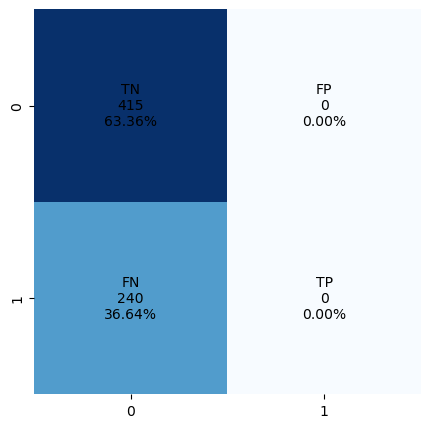

In [350]:
# performances


tp, tn, fp, fn = outcomes(y_val, y_pred)

print(tp, tn, fp, fn)

cf_matrix = confusion_matrix(tp, tn, fp, fn)

auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred >= 0.5)

precision = precision_score(tp, fp)
recall = recall_score(tp, fn)
f1score = f1_score(precision, recall)

print(f'auc={round(auc, 3)}\naccuracy={round(accuracy, 3)}\nprecision={round(precision, 3)}\nrecall={round(recall, 3)}\nf1 score={round(f1score, 3)}')
print()


group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(5, 5))
plot_confMTRX(cf_matrix, labels)

plt.show()


==> this model is actually not performant!

* feature importance with sklearn permutation_importance: a technique for understanding the importance of features in a machine learning model. It works by randomly shuffling the values of a single feature while keeping the other features unchanged, and then measuring the impact on the model's performance

Text(0.5, 0, 'Permutation Importance')

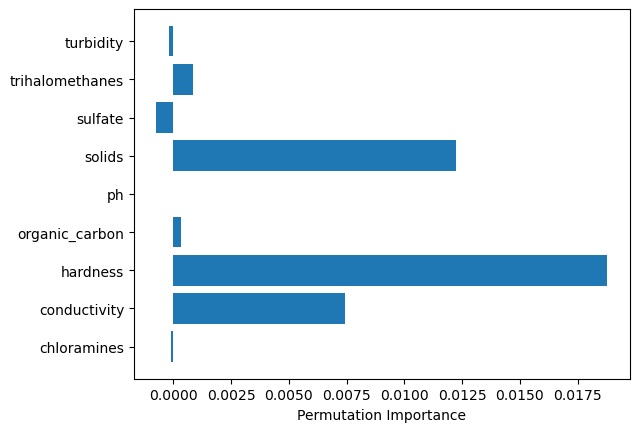

In [351]:
perm_importance = permutation_importance(model, X_val, y_val, scoring='roc_auc', n_repeats=30, random_state=1, n_jobs=-1)


plt.barh(list(dv.get_feature_names_out()), perm_importance.importances_mean)
plt.xlabel("Permutation Importance")

==> hardness and solids are the most impactful features while using Logistic Regression

***Decision Tree***

* baseline model

In [352]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [353]:
# with max_depth = None

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred>=0.5)
print('train:', f'accucary={accuracy}, auc={auc}')

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred>=0.5)
print('val:', f'accucary={accuracy}, auc={auc}')
print()

print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

train: accucary=1.0, auc=1.0
val: accucary=0.5908396946564886, auc=0.569929718875502

|--- sulfate <= 388.53
|   |--- sulfate <= 296.88
|   |   |--- sulfate <= 90.10
|   |   |   |--- ph <= 9.01
|   |   |   |   |--- solids <= 8401.81
|   |   |   |   |   |--- conductivity <= 338.59
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- conductivity >  338.59
|   |   |   |   |   |   |--- turbidity <= 4.88
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- turbidity >  4.88
|   |   |   |   |   |   |   |--- turbidity <= 5.52
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- turbidity >  5.52
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- solids >  8401.81
|   |   |   |   |   |--- turbidity <= 2.75
|   |   |   |   |   |   |--- trihalomethanes <= 55.79
|   |   |   |   |   |   |   |--- ph <= 6.32
|   |   |   |   |   |   |   |   |--- organic_carbon <= 13.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   

==> training the DecisionTreeClassifier() model without precising the depth, it reaches a max_depth=13 leading to an overfitted model: yet it performs perfectly on the train dataset but not that well on the validation dataset, meaning that it memorized the train instances so well that it is not able to generalize

In [354]:
# with max_depth = 1

dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred>=0.5)
print('train:', f'accucary={accuracy}, auc={auc}')

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred>=0.5)
print('val:', f'accucary={accuracy}, auc={auc}')
print()

print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

train: accucary=0.621882951653944, auc=0.5223906737452794
val: accucary=0.6305343511450382, auc=0.5204317269076306

|--- sulfate <= 388.53
|   |--- class: 0
|--- sulfate >  388.53
|   |--- class: 1



==> yet, with max_depth=1 it is possible a better accuracy on the validation dataset with almost the same ability to distinguish between the positive and negative classes as in the training case

* parameters' tuning: 
    * finding the best max_depth
    * then finding out the best min_samples_leaf

In [355]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)


for depth in range(1, 31, 1): 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred>=0.5)
    
    print(f'depth:{depth}, accuracy={round(accuracy, 3)}, auc={round(auc, 3)}')
    
    
depth=None    
dt = DecisionTreeClassifier(max_depth=depth)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred>=0.5)

print(f'depth:{depth}, accuracy={round(accuracy, 3)}, auc={round(auc, 3)}')

depth:1, accuracy=0.631, auc=0.52
depth:2, accuracy=0.644, auc=0.55
depth:3, accuracy=0.64, auc=0.57
depth:4, accuracy=0.666, auc=0.579
depth:5, accuracy=0.661, auc=0.587
depth:6, accuracy=0.655, auc=0.607
depth:7, accuracy=0.627, auc=0.578
depth:8, accuracy=0.637, auc=0.581
depth:9, accuracy=0.617, auc=0.567
depth:10, accuracy=0.603, auc=0.552
depth:11, accuracy=0.588, auc=0.555
depth:12, accuracy=0.585, auc=0.548
depth:13, accuracy=0.557, auc=0.55
depth:14, accuracy=0.582, auc=0.562
depth:15, accuracy=0.591, auc=0.575
depth:16, accuracy=0.6, auc=0.571
depth:17, accuracy=0.566, auc=0.544
depth:18, accuracy=0.594, auc=0.576
depth:19, accuracy=0.588, auc=0.57
depth:20, accuracy=0.569, auc=0.552
depth:21, accuracy=0.585, auc=0.565
depth:22, accuracy=0.573, auc=0.553
depth:23, accuracy=0.576, auc=0.555
depth:24, accuracy=0.563, auc=0.543
depth:25, accuracy=0.582, auc=0.562
depth:26, accuracy=0.583, auc=0.561
depth:27, accuracy=0.58, auc=0.56
depth:28, accuracy=0.58, auc=0.562
depth:29, ac

==> so far, the best results are for max_depth = 6 and max_depth = 5

In [356]:
# searching for the best min_samples_leaf 
# having max_depth = 6 and max_depth = 5

dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

scores = []

for depth in [5, 6]:
    for s in range(1, 201, 1):
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        accuracy = accuracy_score(y_val, y_pred>=0.5)
        
        scores.append((depth, s, auc, accuracy))

        
columns = ['max_depth', 'min_samples_leaf', 'auc', 'accuracy']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,min_samples_leaf,auc,accuracy
0,5,1,0.591195,0.664122
1,5,2,0.584182,0.659542
2,5,3,0.591923,0.664122
3,5,4,0.589101,0.662595
4,5,5,0.581742,0.656489
...,...,...,...,...
395,6,196,0.588509,0.615267
396,6,197,0.588509,0.615267
397,6,198,0.588509,0.615267
398,6,199,0.588509,0.615267


In [357]:
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc,accuracy
201,6,2,0.625994,0.665649
203,6,4,0.625472,0.665649
202,6,3,0.620251,0.662595
210,6,11,0.617254,0.654962
205,6,6,0.614669,0.659542
...,...,...,...,...
282,6,83,0.538484,0.632061
286,6,87,0.537500,0.632061
285,6,86,0.537500,0.632061
284,6,85,0.537500,0.632061


In [358]:
df_scores.sort_values(by='accuracy', ascending=False)

,max_depth,min_samples_leaf,auc,accuracy
201,6,2,0.625994,0.665649
203,6,4,0.625472,0.665649
216,6,17,0.597189,0.665649
225,6,26,0.598238,0.664122
217,6,18,0.595351,0.664122
...,...,...,...,...
257,6,58,0.559724,0.607634
256,6,57,0.559724,0.607634
255,6,56,0.559724,0.607634
251,6,52,0.573614,0.607634


==> the results confirm that the best value for the depth of the tree is max_depth=6 and min_samples_leaf=2

In [359]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=2)
dt.fit(X_train, y_train)

print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- sulfate <= 388.53
|   |--- sulfate <= 296.88
|   |   |--- sulfate <= 90.10
|   |   |   |--- ph <= 9.01
|   |   |   |   |--- solids <= 8401.81
|   |   |   |   |   |--- conductivity <= 338.59
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- conductivity >  338.59
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- solids >  8401.81
|   |   |   |   |   |--- turbidity <= 2.75
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- turbidity >  2.75
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- ph >  9.01
|   |   |   |   |--- solids <= 38327.32
|   |   |   |   |   |--- organic_carbon <= 10.94
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- organic_carbon >  10.94
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- solids >  38327.32
|   |   |   |   |   |--- solids <= 44824.99
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- solids >  44824.99
|   |   |   |   |   |   |--- class: 1
|   |   |--- sulfate >  90.10
|   

* cross-validation: tuning of min_samples_split

In [360]:
n_splits = 10

for min_samp_split in tqdm([2, 3, 5, 10, 20, 30, 40, 50, 100, 150, 200]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_cross = df_full_train.iloc[train_idx]
        df_val_cross = df_full_train.iloc[val_idx]

        y_train_cross = df_train_cross.potability.values
        y_val_cross = df_val_cross.potability.values
        
        dv = DictVectorizer(sparse=False)

        train_dicts = df_train_cross[features].to_dict(orient='records')
        X_train_cross = dv.fit_transform(train_dicts)

        val_dicts = df_val_cross[features].to_dict(orient='records')
        X_val_cross = dv.transform(val_dicts)

        dt = DecisionTreeClassifier(max_depth=6, min_samples_split=min_samp_split, min_samples_leaf=2)
        dt.fit(X_train_cross, y_train_cross)

        y_pred = dt.predict_proba(X_val_cross)[:, 1]

        auc = roc_auc_score(y_val_cross, y_pred)
        scores.append(auc)

    print('min_samp_split=%s %.3f +- %.3f' % (min_samp_split, np.mean(scores), np.std(scores)))

  0%|          | 0/11 [00:00<?, ?it/s]

min_samp_split=2 0.579 +- 0.042
min_samp_split=3 0.578 +- 0.042
min_samp_split=5 0.580 +- 0.042
min_samp_split=10 0.583 +- 0.043
min_samp_split=20 0.582 +- 0.044
min_samp_split=30 0.583 +- 0.045
min_samp_split=40 0.583 +- 0.043
min_samp_split=50 0.580 +- 0.042
min_samp_split=100 0.584 +- 0.037
min_samp_split=150 0.578 +- 0.039
min_samp_split=200 0.566 +- 0.030


==> min_samples_split=100 would make the best choice

In [361]:
# tuned model

dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

dt = DecisionTreeClassifier(max_depth=6, min_samples_split=100, min_samples_leaf=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]


75 353 62 165
auc=0.613
accuracy=0.653
precision=0.547
recall=0.312
f1 score=0.398



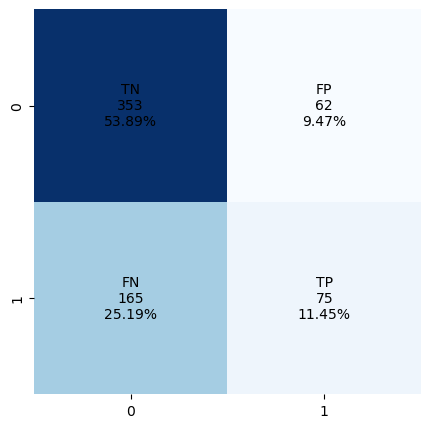

In [363]:
#performances

tp, tn, fp, fn = outcomes(y_val, y_pred)

print(tp, tn, fp, fn)

cf_matrix = confusion_matrix(tp, tn, fp, fn)

auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred >= 0.5)

precision = precision_score(tp, fp)
recall = recall_score(tp, fn)
f1score = f1_score(precision, recall)

print(f'auc={round(auc, 3)}\naccuracy={round(accuracy, 3)}\nprecision={round(precision, 3)}\nrecall={round(recall, 3)}\nf1 score={round(f1score, 3)}')
print()


group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(5, 5))
plot_confMTRX(cf_matrix, labels)

plt.show()

==> DecisionTree model has way better performances than LogisticRegression; it can be considered as a starting point!

* feature importance with sklearn permutation_importance

Text(0.5, 0, 'Permutation Importance')

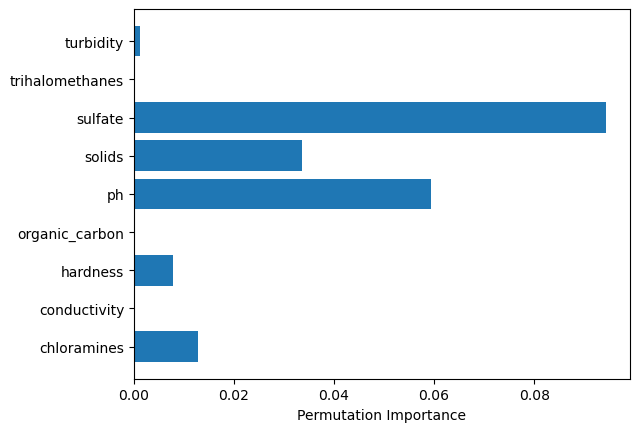

In [364]:
perm_importance = permutation_importance(dt, X_val, y_val, scoring='roc_auc', n_repeats=30, random_state=1, n_jobs=-1)


plt.barh(list(dv.get_feature_names_out()), perm_importance.importances_mean)
plt.xlabel("Permutation Importance")

In [365]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- sulfate <= 388.53
|   |--- sulfate <= 296.88
|   |   |--- sulfate <= 90.10
|   |   |   |--- ph <= 9.01
|   |   |   |   |--- solids <= 8401.81
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- solids >  8401.81
|   |   |   |   |   |--- turbidity <= 2.75
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- turbidity >  2.75
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- ph >  9.01
|   |   |   |   |--- class: 0
|   |   |--- sulfate >  90.10
|   |   |   |--- ph <= 6.85
|   |   |   |   |--- sulfate <= 258.76
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sulfate >  258.76
|   |   |   |   |   |--- chloramines <= 5.60
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- chloramines >  5.60
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- ph >  6.85
|   |   |   |   |--- solids <= 12298.14
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- solids >  12298.14
|   |   |   |   |   |--- class: 1
|   |--- sulfate >  296.88
|   |   |--- hardness

==> and sulfate and ph are the most impactful features on the model, followed by solids and chloramines

***Random Forest***

* baseline model 

In [366]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [367]:
# building a baseline model with number

rf = RandomForestClassifier() # by defalut n_estimators=100 and random_state=None
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred>=0.5)
print(f'auc={round(auc, 3)}, accuracy={round(accuracy, 3)}')

auc=0.662, accuracy=0.667


==> the RandomForestClassifier baseline model shows an auc score that is slighty better than the consolidated DecisonTreeClassifier model

* tuning:
    * finding out the best max_depth, then the
         best min_samples_leaf and consequently the best n_estimators

n=10, auc=0.572, accuracy=0.579
n=20, auc=0.608, accuracy=0.618
n=30, auc=0.625, accuracy=0.638
n=40, auc=0.635, accuracy=0.658
n=50, auc=0.639, accuracy=0.664
n=60, auc=0.654, accuracy=0.669
n=70, auc=0.651, accuracy=0.664
n=80, auc=0.649, accuracy=0.66
n=90, auc=0.658, accuracy=0.672
n=100, auc=0.661, accuracy=0.669
n=110, auc=0.658, accuracy=0.675
n=120, auc=0.656, accuracy=0.678
n=130, auc=0.659, accuracy=0.672
n=140, auc=0.658, accuracy=0.681
n=150, auc=0.657, accuracy=0.684
n=160, auc=0.655, accuracy=0.69
n=170, auc=0.655, accuracy=0.685
n=180, auc=0.654, accuracy=0.685
n=190, auc=0.656, accuracy=0.681
n=200, auc=0.657, accuracy=0.679
n=210, auc=0.655, accuracy=0.684
n=220, auc=0.653, accuracy=0.682
n=230, auc=0.654, accuracy=0.678
n=240, auc=0.654, accuracy=0.679
n=250, auc=0.653, accuracy=0.678
n=260, auc=0.654, accuracy=0.673
n=270, auc=0.654, accuracy=0.673
n=280, auc=0.655, accuracy=0.675
n=290, auc=0.653, accuracy=0.666
n=300, auc=0.652, accuracy=0.672

sorting by auc:


,n_estimators,auc,accuracy
9,100,0.661,0.669
12,130,0.659,0.672
13,140,0.658,0.681
8,90,0.658,0.672
10,110,0.658,0.675
19,200,0.657,0.679
14,150,0.657,0.684
11,120,0.656,0.678
18,190,0.656,0.681
20,210,0.655,0.684



sorting by accuracy:


,n_estimators,auc,accuracy
15,160,0.655,0.690
17,180,0.654,0.685
16,170,0.655,0.685
20,210,0.655,0.684
14,150,0.657,0.684
21,220,0.653,0.682
13,140,0.658,0.681
18,190,0.656,0.681
23,240,0.654,0.679
19,200,0.657,0.679


Text(0.5, 1.0, 'evolution of auc')

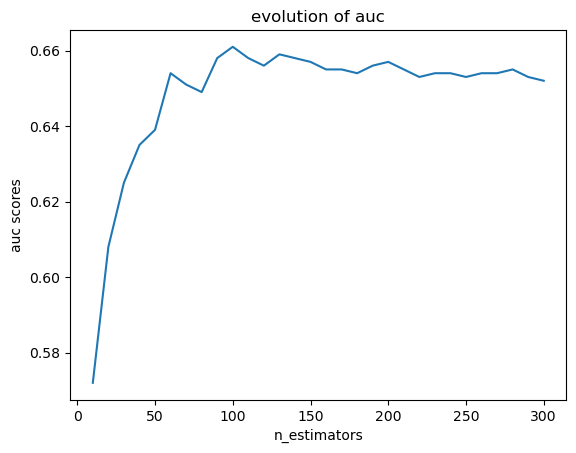

In [368]:
scores = []

for n in range(10, 301, 10):
    
    rf = RandomForestClassifier(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred>=0.5)
    print(f'n={n}, auc={round(auc, 3)}, accuracy={round(accuracy, 3)}')
    
    scores.append((n, round(auc, 3), round(accuracy, 3)))
    
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc', 'accuracy'])
print()
print('sorting by auc:')
display(df_scores.sort_values(by='auc', ascending=False))
print()
print('sorting by accuracy:')
display(df_scores.sort_values(by='accuracy', ascending=False))
print()
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('n_estimators')
plt.ylabel('auc scores')
plt.title('evolution of auc')

==> based on the auc score n_estimators=100 is the best with auc=0.661 and accuracy=0.669
based on accuracy instead n_estimators=160 is the best with auc=0.655 and accuracy=0.690


In [369]:
# tuning max_depth

dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)



scores = []

for d in range(1, 21, 1):
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d, 
                                    random_state=1, 
                                    n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        accuracy = accuracy_score(y_val, y_pred>=0.5)


        scores.append((d, n, round(auc, 3), round(accuracy, 3)))
        
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc', 'accuracy'])
print('sorting by auc:')
display(df_scores.sort_values(by='auc', ascending=False))
print()
print('sorting by accuracy:')
display(df_scores.sort_values(by='accuracy', ascending=False))

sorting by auc:


,max_depth,n_estimators,auc,accuracy
348,18,90,0.668,0.678
299,15,200,0.666,0.676
354,18,150,0.666,0.670
353,18,140,0.666,0.678
298,15,190,0.665,0.675
...,...,...,...,...
14,1,150,0.529,0.634
15,1,160,0.529,0.634
17,1,180,0.528,0.634
18,1,190,0.527,0.634



sorting by accuracy:


,max_depth,n_estimators,auc,accuracy
259,13,200,0.660,0.692
373,19,140,0.663,0.689
258,13,190,0.659,0.687
254,13,150,0.655,0.685
372,19,130,0.663,0.685
...,...,...,...,...
240,13,10,0.596,0.611
361,19,20,0.590,0.609
360,19,10,0.574,0.606
380,20,10,0.582,0.598


==> best max_depth results to lay in the range between 13 and 19

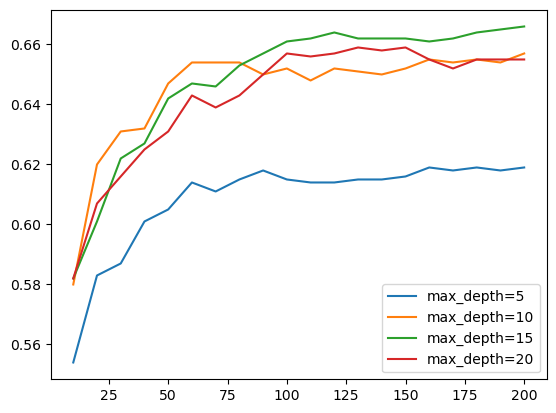

In [374]:
for d in range(5, 21, 5):
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

==> this confirms it! 

now let's check it:

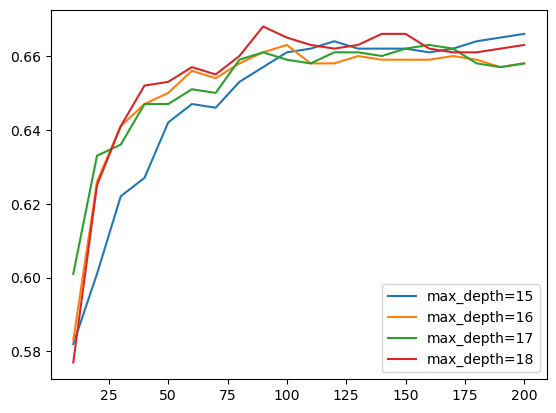

In [375]:
for d in range(15, 19, 1):
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

==> best max_depth=18

In [376]:
# tuning min_samples_leaf

max_depth = 18

scores = []

for s in range(1, 50, 1):
    for n in range(10, 201, 10):

        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1, 
                                    n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        accuracy = accuracy_score(y_val, y_pred>=0.5)


        scores.append((s, n, round(auc, 3), round(accuracy, 3)))
        
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc', 'accuracy'])
print('sorting by auc:')
display(df_scores.sort_values(by='auc', ascending=False))
print()
print('sorting by accuracy:')
display(df_scores.sort_values(by='accuracy', ascending=False))

sorting by auc:


,min_samples_leaf,n_estimators,auc,accuracy
8,1,90,0.668,0.678
14,1,150,0.666,0.670
13,1,140,0.666,0.678
9,1,100,0.665,0.679
12,1,130,0.663,0.670
...,...,...,...,...
880,45,10,0.569,0.640
840,43,10,0.564,0.641
920,47,10,0.564,0.646
280,15,10,0.561,0.626



sorting by accuracy:


,min_samples_leaf,n_estimators,auc,accuracy
10,1,110,0.663,0.684
9,1,100,0.665,0.679
56,3,170,0.653,0.678
45,3,60,0.640,0.678
740,38,10,0.602,0.678
...,...,...,...,...
280,15,10,0.561,0.626
260,14,10,0.590,0.624
40,3,10,0.597,0.621
60,4,10,0.589,0.618


==> best min_samples_leaf is indiscussibly 1

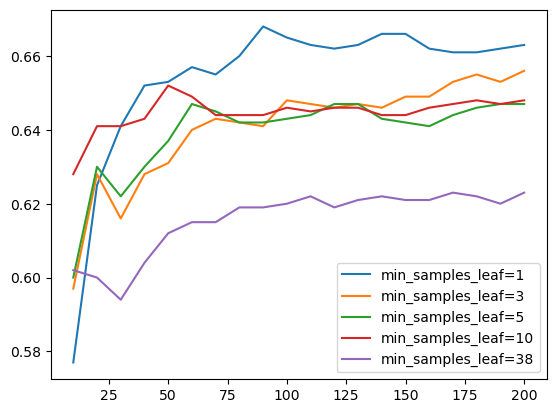

In [377]:
for s in [1, 3, 5, 10, 38]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='min_samples_leaf=%d' % s)

plt.legend()

cross-validation: tuning of max_features and bootstrap (by default is True)

In [378]:
n_splits = 10

for max_feats in tqdm([2, 3, 4, 5, 6, 7, 8, 9]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []
    
    for n in [90, 100, 110, 130, 140, 150]:
        print('n=%s' % (n))
        for train_idx, val_idx in kfold.split(df_full_train):
            df_train_cross = df_full_train.iloc[train_idx]
            df_val_cross = df_full_train.iloc[val_idx]

            y_train_cross = df_train_cross.potability.values
            y_val_cross = df_val_cross.potability.values

            dv = DictVectorizer(sparse=False)

            train_dicts = df_train_cross[features].to_dict(orient='records')
            X_train_cross = dv.fit_transform(train_dicts)

            val_dicts = df_val_cross[features].to_dict(orient='records')
            X_val_cross = dv.transform(val_dicts)

            rf = RandomForestClassifier(n_estimators=n,
                                max_depth=18,
                                min_samples_leaf=1, 
                                max_features=max_feats, 
                                random_state=1,
                                n_jobs=-1)
            rf.fit(X_train_cross, y_train_cross)

            y_pred = rf.predict_proba(X_val_cross)[:, 1]

            auc = roc_auc_score(y_val_cross, y_pred)
            scores.append(auc)

        print('max_feats=%s %.3f +- %.3f' % (max_feats, np.mean(scores), np.std(scores)))
        print()

  0%|          | 0/8 [00:00<?, ?it/s]

n=90
max_feats=2 0.649 +- 0.039

n=100
max_feats=2 0.649 +- 0.039

n=110
max_feats=2 0.649 +- 0.039

n=130
max_feats=2 0.649 +- 0.039

n=140
max_feats=2 0.648 +- 0.038

n=150
max_feats=2 0.649 +- 0.038

n=90
max_feats=3 0.655 +- 0.030

n=100
max_feats=3 0.656 +- 0.030

n=110
max_feats=3 0.657 +- 0.030

n=130
max_feats=3 0.657 +- 0.031

n=140
max_feats=3 0.657 +- 0.031

n=150
max_feats=3 0.657 +- 0.031

n=90
max_feats=4 0.647 +- 0.037

n=100
max_feats=4 0.647 +- 0.037

n=110
max_feats=4 0.647 +- 0.038

n=130
max_feats=4 0.647 +- 0.038

n=140
max_feats=4 0.647 +- 0.039

n=150
max_feats=4 0.648 +- 0.039

n=90
max_feats=5 0.653 +- 0.036

n=100
max_feats=5 0.652 +- 0.036

n=110
max_feats=5 0.652 +- 0.036

n=130
max_feats=5 0.652 +- 0.036

n=140
max_feats=5 0.651 +- 0.036

n=150
max_feats=5 0.651 +- 0.036

n=90
max_feats=6 0.654 +- 0.038

n=100
max_feats=6 0.654 +- 0.038

n=110
max_feats=6 0.655 +- 0.038

n=130
max_feats=6 0.654 +- 0.038

n=140
max_feats=6 0.654 +- 0.038

n=150
max_feats=6 0

==> best max_features is 3, for n_estimators=110

In [379]:
# selected final RandomForestClassifier model with max_features=3 
# n_estimators=110 and bootstrap=False

dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)


n_estimators=110
max_depth=18
min_samples_leaf=1
max_features=3

rf = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf, 
                            max_features=max_features, 
                            bootstrap=False, 
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]

auc=0.642
accuracy=0.66
precision=0.563
recall=0.317
f1 score=0.405



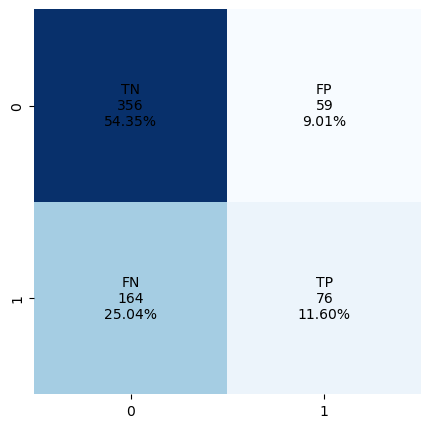

In [380]:
tp, tn, fp, fn = outcomes(y_val, y_pred)

cf_matrix = confusion_matrix(tp, tn, fp, fn)

auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred >= 0.5)

precision = precision_score(tp, fp)
recall = recall_score(tp, fn)
f1score = f1_score(precision, recall)

print(f'auc={round(auc, 3)}\naccuracy={round(accuracy, 3)}\nprecision={round(precision, 3)}\nrecall={round(recall, 3)}\nf1 score={round(f1score, 3)}')
print()


group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(5, 5))
plot_confMTRX(cf_matrix, labels)

plt.show()


In [393]:
# selected final RandomForestClassifier model with max_features=3 
#  n_estimators=110 and bootstrap=True

dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)


n_estimators=110
max_depth=18
min_samples_leaf=1
max_features=3

rf = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf, 
                            max_features=max_features, 
                            bootstrap=True, 
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]

78 370 45 162
auc=0.663
accuracy=0.684
precision=0.634
recall=0.325
f1 score=0.43



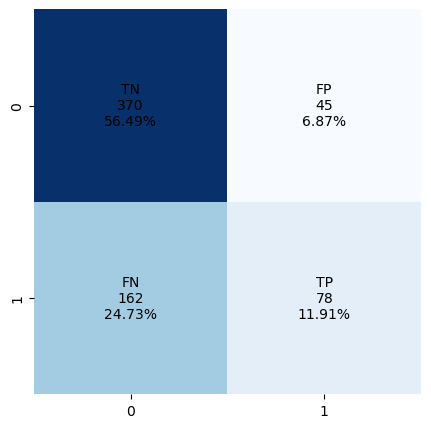

In [394]:
tp, tn, fp, fn = outcomes(y_val, y_pred)

print(tp, tn, fp, fn)

cf_matrix = confusion_matrix(tp, tn, fp, fn)

auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred >= 0.5)

precision = precision_score(tp, fp)
recall = recall_score(tp, fn)
f1score = f1_score(precision, recall)

print(f'auc={round(auc, 3)}\naccuracy={round(accuracy, 3)}\nprecision={round(precision, 3)}\nrecall={round(recall, 3)}\nf1 score={round(f1score, 3)}')
print()


group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(5, 5))
plot_confMTRX(cf_matrix, labels)

plt.show()


==> with bootstrap=True we get a way better performance!

* using RandomForest feature_importances_: i provides a direct measure of how much each feature contributes to the decision-making process within the Random Forest

Text(0.5, 0, 'Random Forest Feature Importance')

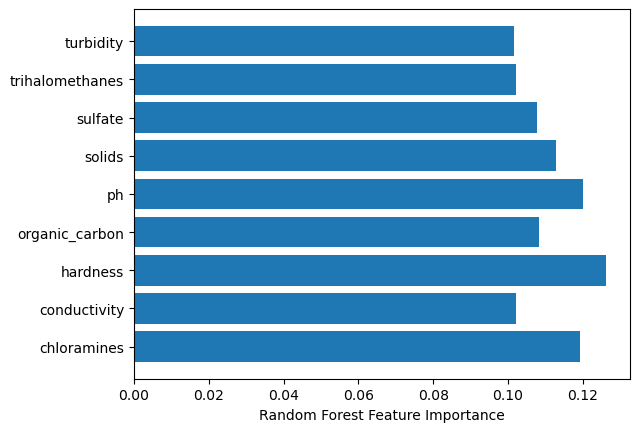

In [383]:
rf.feature_importances_

plt.barh(list(dv.get_feature_names_out()), rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

* feature importance with sklearn permutation_importance

Text(0.5, 0, 'Permutation Importance')

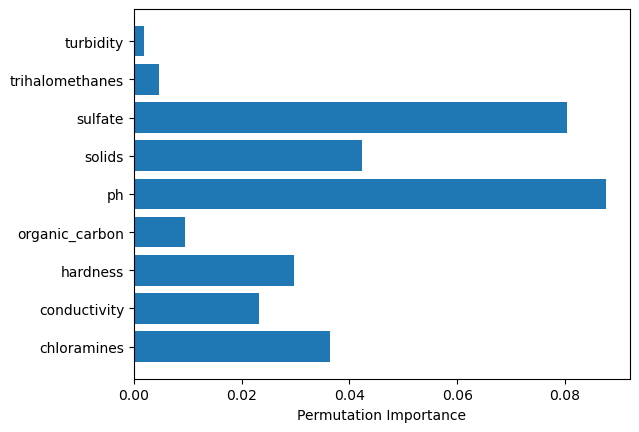

In [384]:
perm_importance = permutation_importance(rf, X_val, y_val, scoring='roc_auc', n_repeats=30, random_state=1, n_jobs=-1)

plt.barh(list(dv.get_feature_names_out()), perm_importance.importances_mean)
plt.xlabel("Permutation Importance")

In [387]:
# selected final RandomForestClassifier model without max_features 
#  with n_estimators=90 and bootstrap=False

dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)


n_estimators=90
max_depth=18
min_samples_leaf=1

rf = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf, 
                            bootstrap=False, 
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]

auc=0.639
accuracy=0.658
precision=0.557
recall=0.325
f1 score=0.411



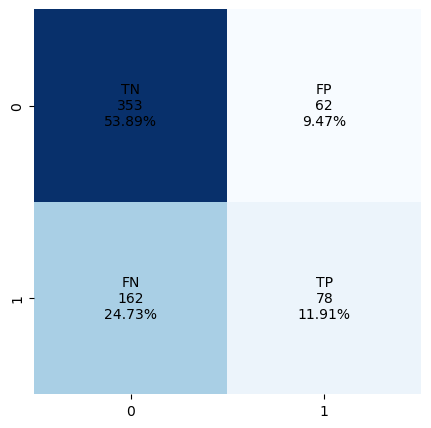

In [388]:
tp, tn, fp, fn = outcomes(y_val, y_pred)


cf_matrix = confusion_matrix(tp, tn, fp, fn)

auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred >= 0.5)

precision = precision_score(tp, fp)
recall = recall_score(tp, fn)
f1score = f1_score(precision, recall)

print(f'auc={round(auc, 3)}\naccuracy={round(accuracy, 3)}\nprecision={round(precision, 3)}\nrecall={round(recall, 3)}\nf1 score={round(f1score, 3)}')
print()


group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(5, 5))
plot_confMTRX(cf_matrix, labels)

plt.show()


In [395]:
# selected final RandomForestClassifier model without max_features 
#  with n_estimators=90 and bootstrap=True

dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)


n_estimators=90
max_depth=18
min_samples_leaf=1

rf = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf, 
                            bootstrap=True, 
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]

76 368 47 164
auc=0.668
accuracy=0.678
precision=0.618
recall=0.317
f1 score=0.419



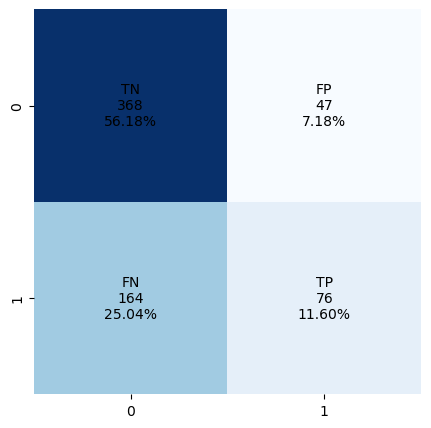

In [396]:
tp, tn, fp, fn = outcomes(y_val, y_pred)

print(tp, tn, fp, fn)

cf_matrix = confusion_matrix(tp, tn, fp, fn)

auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred >= 0.5)

precision = precision_score(tp, fp)
recall = recall_score(tp, fn)
f1score = f1_score(precision, recall)

print(f'auc={round(auc, 3)}\naccuracy={round(accuracy, 3)}\nprecision={round(precision, 3)}\nrecall={round(recall, 3)}\nf1 score={round(f1score, 3)}')
print()


group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(5, 5))
plot_confMTRX(cf_matrix, labels)

plt.show()

==> also in this case with bootstrap=True the performance is way better!

* using RandomForest feature_importances_: i provides a direct measure of how much each feature contributes to the decision-making process within the Random Forest

Text(0.5, 0, 'Random Forest Feature Importance')

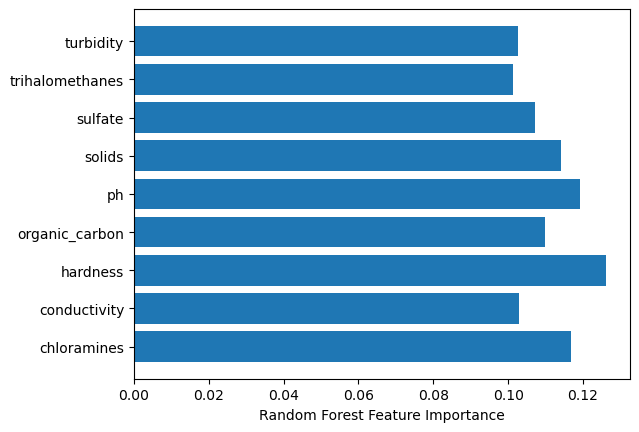

In [391]:
rf.feature_importances_

plt.barh(list(dv.get_feature_names_out()), rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

* feature importance with sklearn permutation_importance

Text(0.5, 0, 'Permutation Importance')

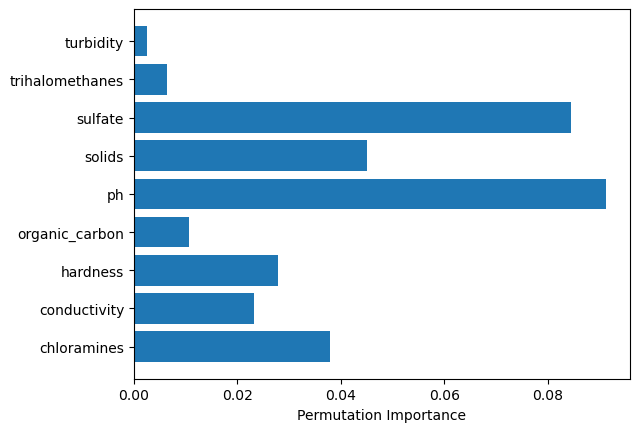

In [392]:
perm_importance = permutation_importance(rf, X_val, y_val, scoring='roc_auc', n_repeats=30, random_state=1, n_jobs=-1)

plt.barh(list(dv.get_feature_names_out()), perm_importance.importances_mean)
plt.xlabel("Permutation Importance")

* considerations on both the 2 tuned RandomForest models: RandomForest with n_estimators=110, max_depth=18, min_samples_leaf=1, max_features=3 and bootstrap=True shows sightly better performances across all the metrics

==> having a max_features imposed reduces a little the auc of the model but increases its overall robustness

==> 'hardness' results to be the most important feature, but the differences in the values with respect to the other features is really low, almost insignificant

==> it is observable that 'sulfate' and 'ph' are the most impactful features, considering roc_auc_score as the evaluation metric: so in its ability in discriminating between the positive and negative classes, the model leverages the most on 'sulfate' and 'ph' features

***XGBoost***

* baseline model

In [478]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [479]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)


features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [480]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'seed': 1,
    'verbosity': 1,
}



model = xgb.train(xgb_params, dtrain, num_boost_round=10,
                  verbose_eval=True,
                  evals=watchlist)

,num_iter,train_auc,val_auc
0,0,0.70539,0.62509
1,1,0.80392,0.63294
2,2,0.81327,0.62918
3,3,0.83520,0.62910
4,4,0.85863,0.63448
5,5,0.87118,0.63078
6,6,0.87398,0.63072
7,7,0.88148,0.63716
8,8,0.90787,0.63459
9,9,0.92288,0.62641


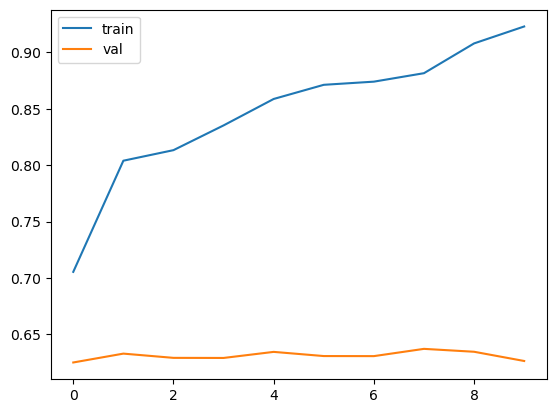

In [481]:
df_score = parse_xgb_output(output)
display(df_score)
print()
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

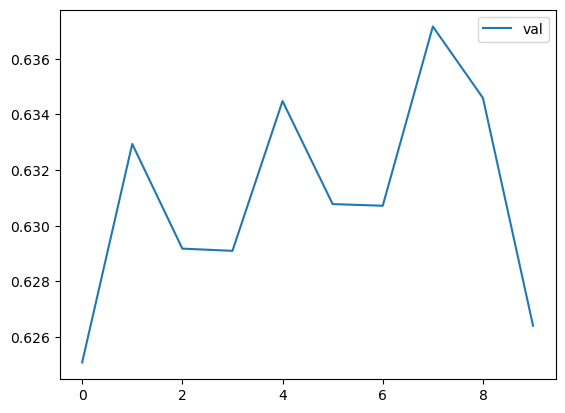

In [482]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

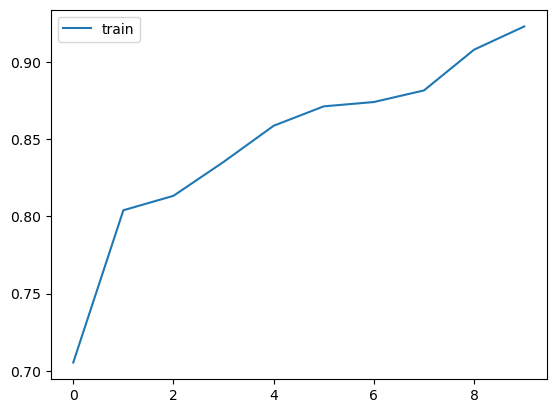

In [483]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.legend()

In [484]:
display(df_score.sort_values(by='val_auc', ascending=False))

,num_iter,train_auc,val_auc
7,7,0.88148,0.63716
8,8,0.90787,0.63459
4,4,0.85863,0.63448
1,1,0.80392,0.63294
5,5,0.87118,0.63078
6,6,0.87398,0.63072
2,2,0.81327,0.62918
3,3,0.83520,0.62910
9,9,0.92288,0.62641
0,0,0.70539,0.62509


In [485]:
display(df_score.sort_values(by='train_auc', ascending=False))

,num_iter,train_auc,val_auc
9,9,0.92288,0.62641
8,8,0.90787,0.63459
7,7,0.88148,0.63716
6,6,0.87398,0.63072
5,5,0.87118,0.63078
4,4,0.85863,0.63448
3,3,0.83520,0.62910
2,2,0.81327,0.62918
1,1,0.80392,0.63294
0,0,0.70539,0.62509


==> the performance results achieved for XGBoost baseline model show some signs of overfitting

* tuning the model
    * finding out the best eta
    * finding out the best max_depth 
    * finding out the best min_child_weight

In [486]:
%%capture output

etas = [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 1.0]

for eta in etas:
    

    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                      verbose_eval=5, 
                      evals=watchlist)

In [487]:
#print(output.stdout)

#len(output.stdout.strip().split('\n'))
#print(output.stdout.strip().split('\n'))

In [488]:

def parse_xgb_output_pro(output, param_name, param_values):
    
    idx = 0
    line_count = 0
    results = []
    scores = {}

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
        
        line_count += 1
        
        if line_count % (len(output.stdout.strip().split('\n'))//len(param_values)) == 0:
            
            columns = ['num_iter', 'train_auc', 'val_auc']
            df_results = pd.DataFrame(results, columns=columns)
            
            key = param_name+'=%s' % (param_values[idx])
            scores[key] = df_results
            print(f'{param_name}={param_values[idx]} done!')
            
            results = []
            line_count = 0
            idx += 1
            
    return scores
    

In [489]:
scores = parse_xgb_output_pro(output, 'eta', [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 1.0])
scores.keys()

eta=1e-05 done!
eta=0.0001 done!
eta=0.001 done!
eta=0.01 done!
eta=0.05 done!
eta=0.1 done!
eta=0.3 done!
eta=1.0 done!


dict_keys(['eta=1e-05', 'eta=0.0001', 'eta=0.001', 'eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1.0'])

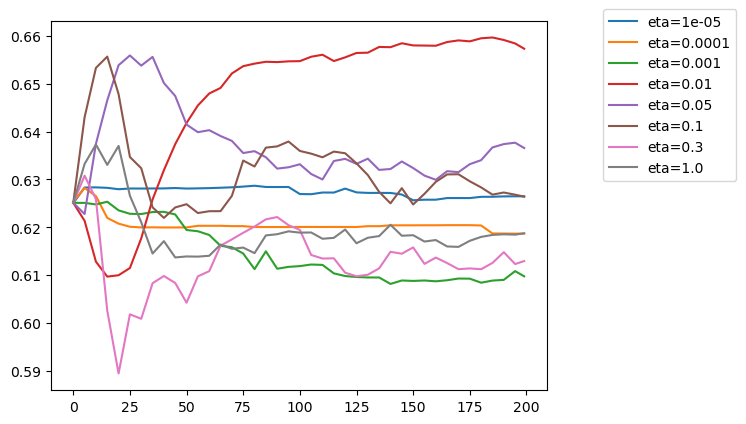

In [490]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend(bbox_to_anchor=(1.1, 1.05))

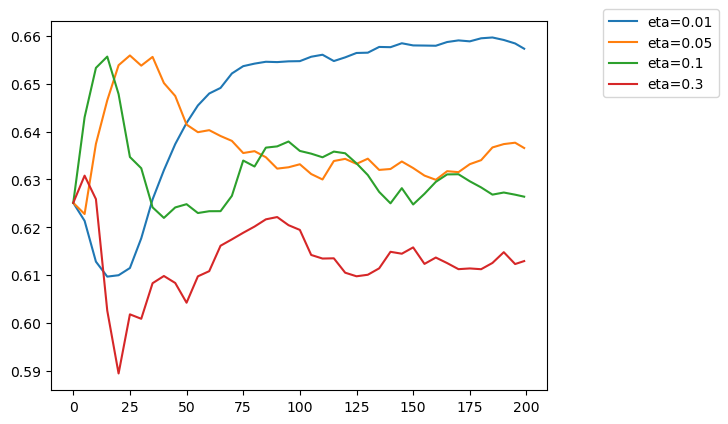

In [491]:
etas = ['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend(bbox_to_anchor=(1.1, 1.05))

==> eta=0.01 will make the best choice

In [492]:
%%capture output

max_depths = [3, 4, 5, 6, 10, 13, 15, 20]

for max_depth in max_depths:
    

    xgb_params = {
        'eta': 0.01, 
        'max_depth': max_depth,
        'min_child_weight': 1,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                      verbose_eval=5, 
                      evals=watchlist)

In [493]:
scores = parse_xgb_output_pro(output, 'max_depth', max_depths)
scores.keys()

max_depth=3 done!
max_depth=4 done!
max_depth=5 done!
max_depth=6 done!
max_depth=10 done!
max_depth=13 done!
max_depth=15 done!
max_depth=20 done!


dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=5', 'max_depth=6', 'max_depth=10', 'max_depth=13', 'max_depth=15', 'max_depth=20'])

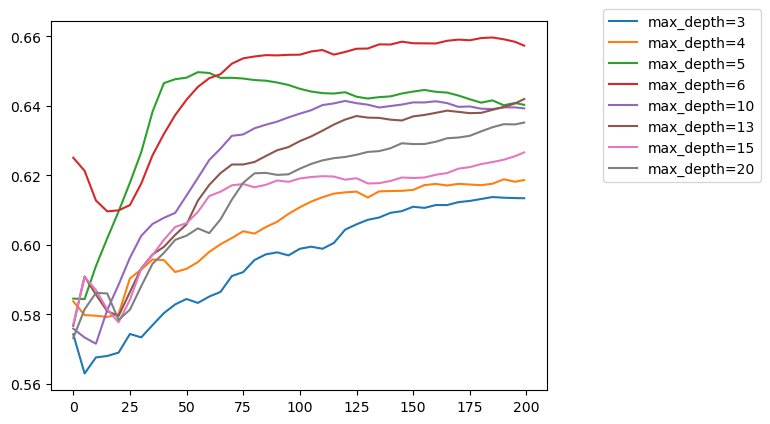

In [494]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend(bbox_to_anchor=(1.1, 1.05))

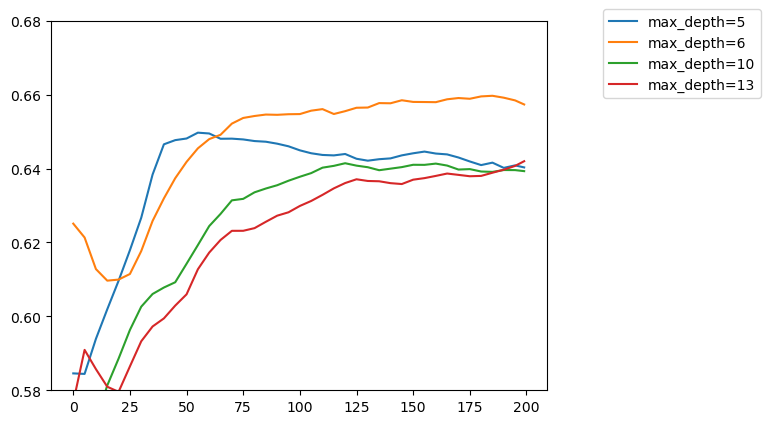

In [495]:
max_depths = ['max_depth=5', 'max_depth=6', 'max_depth=10', 'max_depth=13']

for max_depth in max_depths:
    df_score = scores[max_depth]
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.58, 0.68)
plt.legend(bbox_to_anchor=(1.1, 1.05))

==> 'max_depth=6' will make the best choice iven if it decreases in the first 25 interactions

In [496]:
%%capture output

min_child_weights = [1, 3, 5, 10, 15, 20, 30]

for min_child_weight in min_child_weights:
    

    xgb_params = {
        'eta': 0.01, 
        'max_depth': 6,
        'min_child_weight': min_child_weight,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                      verbose_eval=5, 
                      evals=watchlist)

In [497]:
scores = parse_xgb_output_pro(output, 'min_child_weight', min_child_weights)
scores.keys()

min_child_weight=1 done!
min_child_weight=3 done!
min_child_weight=5 done!
min_child_weight=10 done!
min_child_weight=15 done!
min_child_weight=20 done!
min_child_weight=30 done!


dict_keys(['min_child_weight=1', 'min_child_weight=3', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=15', 'min_child_weight=20', 'min_child_weight=30'])

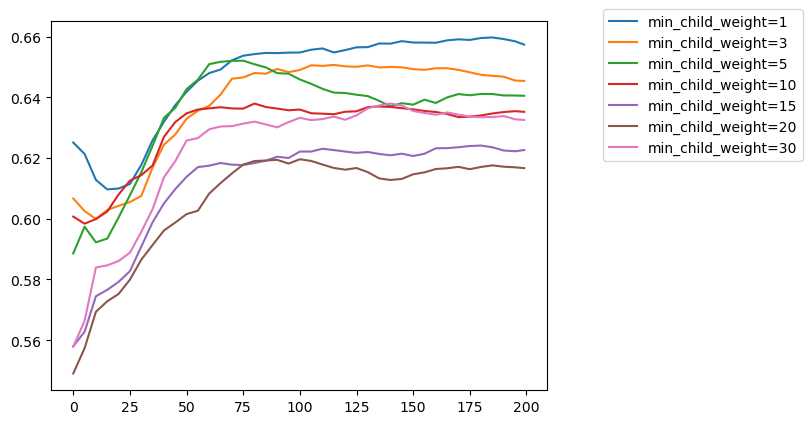

In [498]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend(bbox_to_anchor=(1.1, 1.05))

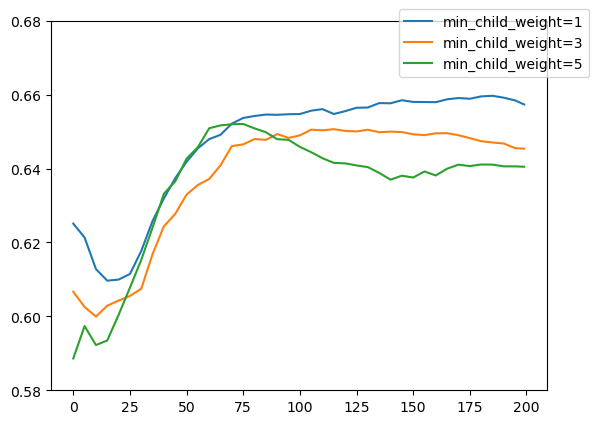

In [499]:
min_child_weights = ['min_child_weight=1', 'min_child_weight=3', 'min_child_weight=5']

for min_child_weight in min_child_weights:
    df_score = scores[min_child_weight]
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.58, 0.68)
#plt.xlim(100, 200)
plt.legend(bbox_to_anchor=(1.1, 1.05))

==> min_child_weight=1 will make the best choice

In [500]:
#print(output.stdout)

In [531]:
# final XGBoost model (for now)

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=170)

In [532]:
model_eval = model.eval(dval)
model_eval

'[0]\teval-auc:0.65898594377510045'

In [533]:
it_line, val_line = model_eval.strip().split('\t')
val = float(val_line.split(':')[1])
print(f'performanche of the xgboost tuned model: auc={round(val, 3)}')
#it_line, train_line, val_line = line.split('\t')


performanche of the xgboost tuned model: auc=0.659


61 372 43 179
auc=0.659
accuracy=0.661
precision=0.587
recall=0.254
f1 score=0.355



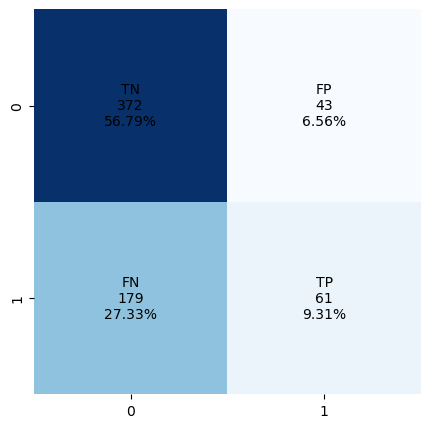

In [534]:
y_pred = model.predict(dval)


#preformances

tp, tn, fp, fn = outcomes(y_val, y_pred)

print(tp, tn, fp, fn)

cf_matrix = confusion_matrix(tp, tn, fp, fn)

auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred >= 0.5)

precision = precision_score(tp, fp)
recall = recall_score(tp, fn)
f1score = f1_score(precision, recall)

print(f'auc={round(auc, 3)}\naccuracy={round(accuracy, 3)}\nprecision={round(precision, 3)}\nrecall={round(recall, 3)}\nf1 score={round(f1score, 3)}')
print()


group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(5, 5))
plot_confMTRX(cf_matrix, labels)

plt.show()

* feature importance with xgboost plot_importance and get_fscore

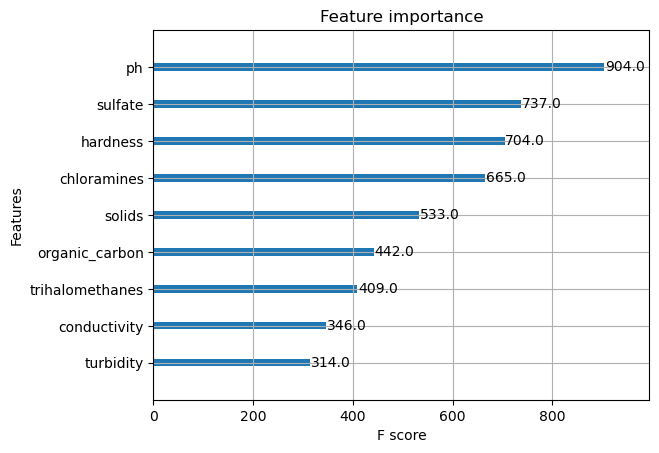

In [505]:
xgb.plot_importance(model)
plt.show()

* cross-validation: tuning subsamples and colsample_bytree parameters

In [506]:
n_splits = 10

for subsample in tqdm([0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_cross = df_full_train.iloc[train_idx]
        df_val_cross = df_full_train.iloc[val_idx]

        y_train_cross = df_train_cross.potability.values
        y_val_cross = df_val_cross.potability.values

        dv = DictVectorizer(sparse=False)

        train_dicts = df_train_cross[features].to_dict(orient='records')
        X_train_cross = dv.fit_transform(train_dicts)

        val_dicts = df_val_cross[features].to_dict(orient='records')
        X_val_cross = dv.transform(val_dicts)
        
        
        features = list(dv.get_feature_names_out())
        dtrain = xgb.DMatrix(X_train_cross, label=y_train_cross, feature_names=features)
        dval = xgb.DMatrix(X_val_cross, label=y_val_cross, feature_names=features)
        
        
        xgb_params = {
            'eta': 0.01, 
            'max_depth': 6,
            'min_child_weight': 1,
            'subsample': subsample, 

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

        model = xgb.train(xgb_params, dtrain, num_boost_round=170)

        y_pred = model.predict(dval)

        auc = roc_auc_score(y_val_cross, y_pred)
        scores.append(auc)

    print('subsample=%s %.3f +- %.3f' % (subsample, np.mean(scores), np.std(scores)))


  0%|          | 0/8 [00:00<?, ?it/s]

subsample=0.2 0.630 +- 0.032
subsample=0.3 0.645 +- 0.037
subsample=0.5 0.644 +- 0.041
subsample=0.6 0.650 +- 0.042
subsample=0.7 0.650 +- 0.042
subsample=0.8 0.646 +- 0.041
subsample=0.9 0.642 +- 0.040
subsample=1 0.630 +- 0.040


==> subsample=0.6 and subsample=0.7 have the higher auc average

In [507]:
n_splits = 10

for colsample_bytree in tqdm([0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_cross = df_full_train.iloc[train_idx]
        df_val_cross = df_full_train.iloc[val_idx]

        y_train_cross = df_train_cross.potability.values
        y_val_cross = df_val_cross.potability.values

        dv = DictVectorizer(sparse=False)

        train_dicts = df_train_cross[features].to_dict(orient='records')
        X_train_cross = dv.fit_transform(train_dicts)

        val_dicts = df_val_cross[features].to_dict(orient='records')
        X_val_cross = dv.transform(val_dicts)
        
        
        features = list(dv.get_feature_names_out())
        dtrain = xgb.DMatrix(X_train_cross, label=y_train_cross, feature_names=features)
        dval = xgb.DMatrix(X_val_cross, label=y_val_cross, feature_names=features)
        
        
        xgb_params = {
            'eta': 0.01, 
            'max_depth': 6,
            'min_child_weight': 1,
            'subsample': 0.6, 
            'colsample_bytree': colsample_bytree,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

        model = xgb.train(xgb_params, dtrain, num_boost_round=170)

        y_pred = model.predict(dval)

        auc = roc_auc_score(y_val_cross, y_pred)
        scores.append(auc)

    print('colsample_bytree=%s %.3f +- %.3f' % (colsample_bytree, np.mean(scores), np.std(scores)))

  0%|          | 0/9 [00:00<?, ?it/s]

colsample_bytree=0.1 0.549 +- 0.037
colsample_bytree=0.2 0.549 +- 0.037
colsample_bytree=0.3 0.596 +- 0.040
colsample_bytree=0.5 0.626 +- 0.040
colsample_bytree=0.6 0.634 +- 0.042
colsample_bytree=0.7 0.636 +- 0.037
colsample_bytree=0.8 0.641 +- 0.040
colsample_bytree=0.9 0.645 +- 0.036
colsample_bytree=1 0.650 +- 0.042


==> the highest performance is reach with colsample_bytree=1, which is the default value for that parameter!

In [515]:
# selected xgboost model with 'subsample': 0.6, 'colsample_bytree': 1,


dv = DictVectorizer(sparse=False)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)


features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

watchlist = [(dtrain, 'train'), (dval, 'val')]


In [522]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.6, 
    'colsample_bytree': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=True,
                  evals=watchlist)

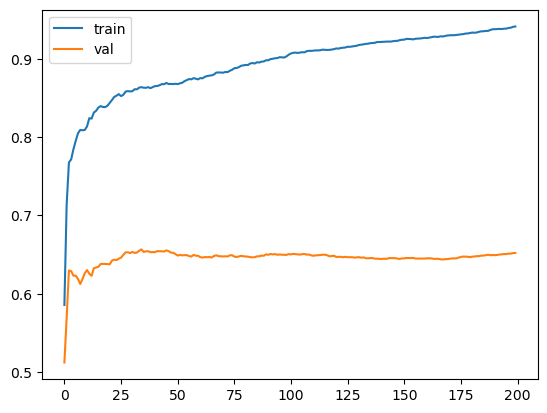

In [523]:
df_score = parse_xgb_output(output)
#display(df_score)
#print()
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

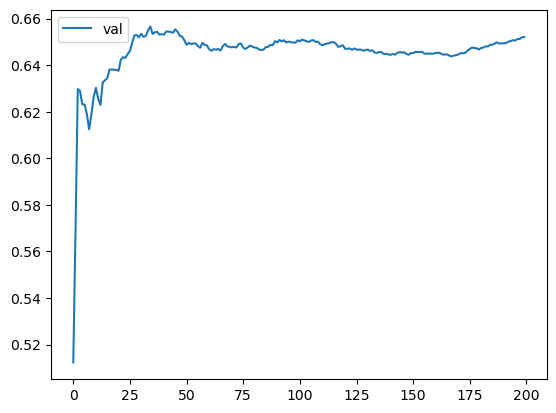

In [524]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [525]:
y_pred = model.predict(dval)

51 381 34 189
auc=0.652
accuracy=0.66
precision=0.6
recall=0.212
f1 score=0.314



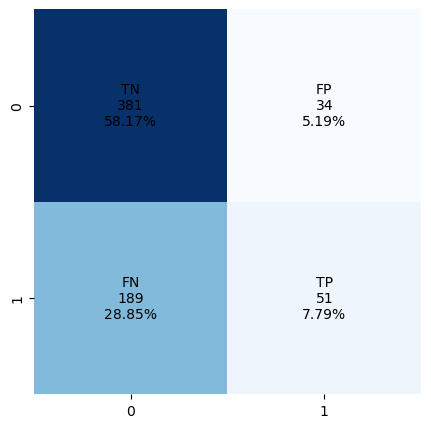

In [526]:
#preformances

tp, tn, fp, fn = outcomes(y_val, y_pred)

print(tp, tn, fp, fn)

cf_matrix = confusion_matrix(tp, tn, fp, fn)

auc = roc_auc_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred >= 0.5)

precision = precision_score(tp, fp)
recall = recall_score(tp, fn)
f1score = f1_score(precision, recall)

print(f'auc={round(auc, 3)}\naccuracy={round(accuracy, 3)}\nprecision={round(precision, 3)}\nrecall={round(recall, 3)}\nf1 score={round(f1score, 3)}')
print()


group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(5, 5))
plot_confMTRX(cf_matrix, labels)

plt.show()

* feature importance with xgboost plot_importance and get_fscore

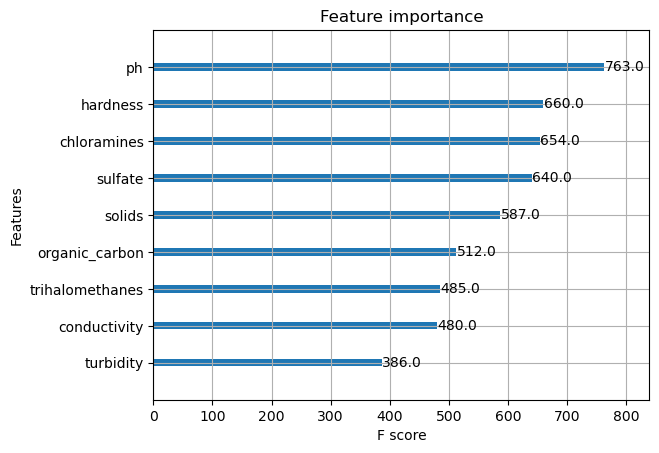

In [521]:
xgb.plot_importance(model)
plt.show()

* Considerations on the 2 final xgboost models: 

==> the first one performs better even with num_boost_round=200 for the first one and a num_boost_round=170 for the second one

==> num_boost_round=170 allows the first model to reach its highest perfomances, as well as num_boost_round=200 does for the second model

==> ph feature for both the models is the most important/impactful feature

**Selection of the FINAL model**

* Logistic Regression
    * tp:0, tn:415, fp:0, fn:240
    * auc=0.524
    * accuracy=0.634
    * precision=0.0
    * recall=0.0
    * f1 score=0.0


* Decision Tree Classifier
    * tp:75, tn:353, fp:62, fn:165
    * auc=0.613
    * accuracy=0.653
    * precision=0.547
    * recall=0.312
    * f1 score=0.398


* Random Forest Classifier
    * tp:78,  tn:370,  fp:45, fn:162
    * auc=0.663
    * accuracy=0.684
    * precision=0.634
    * recall=0.325
    * f1 score=0.43


* Xgboost Tree Classifier 
    * tp:61,  tn:372,  fp:43,  fn:179
    * auc=0.659
    * accuracy=0.661
    * precision=0.587
    * recall=0.254
    * f1 score=0.355

==> the RandomForestClassifier model has the best performances amongst the 4 trained models

**Validating the model on the test dataset**

adding another parameter: class_weight='balanced'

In [547]:
dv = DictVectorizer(sparse=False)

train_dicts = df_full_train[features].to_dict(orient='records')
X_full_train = dv.fit_transform(train_dicts)

test_dicts = df_test[features].to_dict(orient='records')
X_test = dv.transform(test_dicts)


y_full_train = df_full_train.potability.values


n_estimators=110
max_depth=18
min_samples_leaf=1
max_features=3
class_weight='balanced'

rf = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf, 
                            max_features=max_features, 
                            bootstrap=True, 
                            class_weight=class_weight, 
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_full_train, y_full_train)

y_pred = rf.predict_proba(X_test)[:, 1]


80 339 34 203
auc=0.692
accuracy=0.639
precision=0.702
recall=0.283
f1 score=0.403



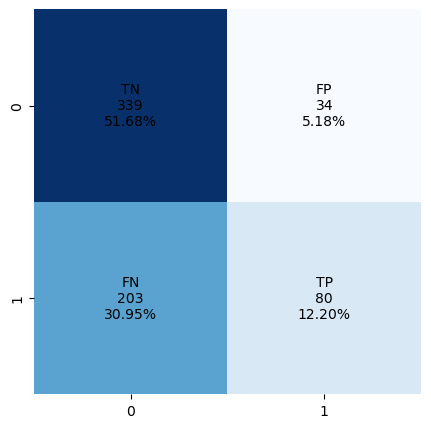

In [548]:
# performances


tp, tn, fp, fn = outcomes(y_test, y_pred)

print(tp, tn, fp, fn)

cf_matrix = confusion_matrix(tp, tn, fp, fn)

auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred >= 0.5)

precision = precision_score(tp, fp)
recall = recall_score(tp, fn)
f1score = f1_score(precision, recall)

print(f'auc={round(auc, 3)}\naccuracy={round(accuracy, 3)}\nprecision={round(precision, 3)}\nrecall={round(recall, 3)}\nf1 score={round(f1score, 3)}')
print()


group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(5, 5))
plot_confMTRX(cf_matrix, labels)

plt.show()
